# Learning Curve Plot

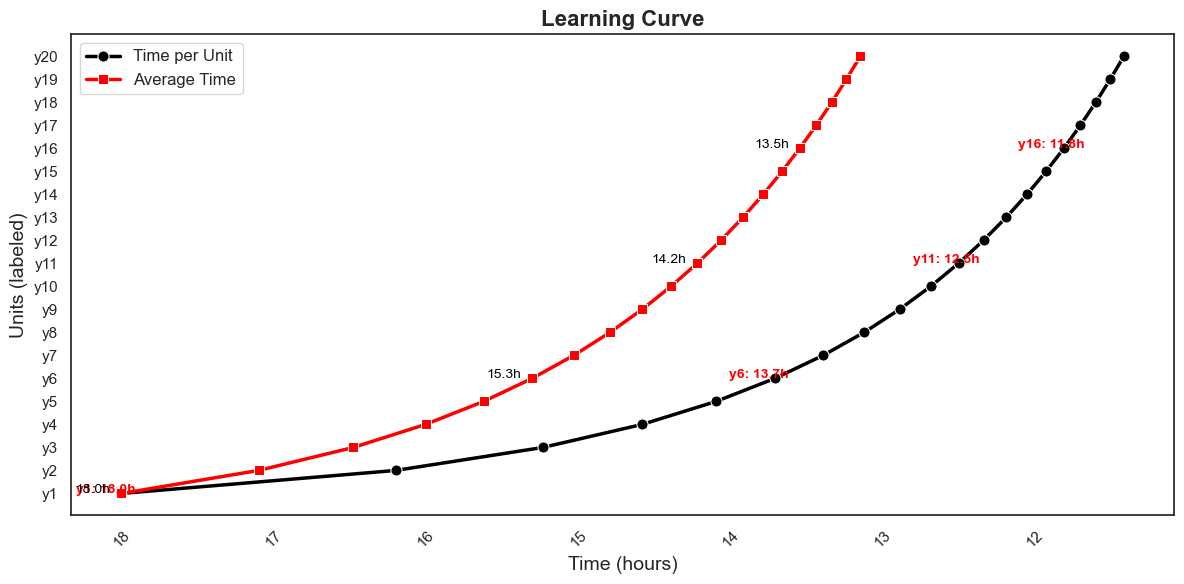

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Inputs ---
a = 18.0            # time for first unit
learning_pct = 0.90 # learning rate (90%)
X = 20              # number of units

# --- Learning curve slope ---
b = np.log(learning_pct) / np.log(2)

# --- Data ---
units = np.arange(1, X+1)
time_per_unit = a * (units ** b)
cumulative_time = np.cumsum(time_per_unit)
average_time = cumulative_time / units

# Make x labels as y1, y2, ..., y20
unit_labels = [f"y{i}" for i in units]

df = pd.DataFrame({
    "Unit": unit_labels,
    "Time_per_unit": time_per_unit,
    "Cumulative_time": cumulative_time,
    "Average_time": average_time
})

# --- Plot ---
sns.set_theme(style="white")
plt.figure(figsize=(12,6))

# Time per unit curve
sns.lineplot(x=time_per_unit, y=unit_labels, 
             marker="o", linewidth=2.5, markersize=8,
             color="black", label="Time per Unit")

# Average time curve
sns.lineplot(x=average_time, y=unit_labels, 
             marker="s", linewidth=2.5, markersize=7,
             color="red", label="Average Time")

# Titles and labels
plt.title("Learning Curve", fontsize=16, weight="bold")
plt.xlabel("Time (hours)", fontsize=14)
plt.ylabel("Units (labeled)", fontsize=14)

# Reverse y-axis so y1 is at the bottom
plt.gca().invert_yaxis()
# Optional: reverse x-axis if you want decreasing trend
plt.gca().invert_xaxis()

# Rotate x labels
plt.xticks(rotation=45)

# --- Annotate every 5th product ---
interval = 5
for i in range(0, X, interval):
    plt.text(time_per_unit[i]+0.3, unit_labels[i], 
             f"{unit_labels[i]}: {time_per_unit[i]:.1f}h", 
             color="red", fontsize=10, weight="bold")
    plt.text(average_time[i]+0.3, unit_labels[i], 
             f"{average_time[i]:.1f}h", 
             color="black", fontsize=10)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
